### Kaustav Vats (2016048)
### Topic- K-Mean Clustering

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

In [118]:
class Point:
    def __init__(self, name, point_class):
        self.Name = name
        self.c = point_class
        
    def __str__(self):
        return self.c + " " + self.Name
    
    def getName(self):
        return self.Name
    def getClass(self):
        return self.c
    
def load_data(filename, point_class):
    data = []
    temp = []
    file = open(filename, 'r')
    for line in file:
        line = line.strip().split(" ")
        val = list(map(float, line[1:]))
        data.append((line[0], point_class, np.asarray(val)))
        temp.append(val)
    temp = np.asarray(temp)
#     temp = Normalize(temp)
    mean = np.mean(temp, axis=0)
    return data, mean

def pre_process(data):
    X = np.zeros((len(data), data[0][2].shape[0]))
    Y = []
    for i in range(len(data)):
        X[i, :] = data[i][2][:]
        Y.append(Point(data[i][0], data[i][1]))
    return X, Y

def Normalize(x):
    x = normalize(x, axis=1, norm='l2')
    return x

def getEuclideanDistance(center, x):
    t = center - x
    t = np.square(t)
    t = np.sum(t, axis=1)
    t = np.sqrt(t)
    return t

def getManhattanDistance(center, x):
    t = center - x
    t = np.absolute(t)
    t = np.sum(t, axis=1)
    return t

def UpdateMean(k, label, x, Centroids):
    centers = []
#     print(label)
    for i in range(k):
        centers.append([])
    
    for i in range(label.shape[0]):
        centers[label[i]].append(x[i, :])
    
    for i in range(k):
        if len(centers[i]) > 0:
            centers[i] = np.vstack(tuple(centers[i]))
            centers[i] = np.mean(centers[i], axis=0)
            centers[i] = np.reshape(centers[i], (1, centers[i].shape[0]))
        else:
            centers[i] = np.zeros((1, x.shape[1]))
    return centers

def StoppingCondition(C, P):
    for i in range(len(C)):
        if not np.allclose(C[i], P[i]):
            return True
    return False

def getLabelsCosineSim(c, x):
    Label = np.zeros(x.shape[0], dtype=np.int64)
    Similarities = []
    for i in range(len(c)):
#         csv = np.dot(c, x[i, :]){
#         print(csv.shape)
#         csv /= (norm(c)*norm(x[i, :]))
#         print("c:", c[i].shape)
        csv = cosine_similarity(c[i], x)
#         print(csv.shape)
        Similarities.append(csv)
#         Label[i] = np.argmax(cosine_similarity(c, np.reshape(x[i, :], (1, x.shape[1]))), axis=0)
    Similarities = np.vstack(tuple(Similarities))
    Label = np.argmax(Similarities, axis=0)
#     print("Label", Label.shape)
    return Label

def KMean(K, X, mini=-3.3685, maxi=1.9523, max_iter=1000):
    Label = np.zeros(X.shape[0])
    Label.fill(-1)
    Centroids = []
    for i in range(K):
        Centroids.append(np.random.uniform(low=mini, high=maxi, size=(1, X.shape[1])))
    Prev = deepcopy(Centroids)
    
    # Stopping Conditions
    for i in tqdm(range(max_iter)):
#     while(StoppingCondition(Centroids, Prev)):
#         D = np.zeros((K, X.shape[0]))
#         for c in range(K):
#             D[c, :] = getManhattanDistance(Centroids[c], X)
#         Label = np.argmin(D, axis=0)
        Label = getLabelsCosineSim(Centroids, X)
        Centroids = UpdateMean(K, Label, X, Centroids)
        if not StoppingCondition(Centroids, Prev):
            break
    return Centroids, Label

def updateAndPrepLabels(y, assignedLabels, labels):
    y_train = np.zeros(len(y))
    y_test = np.zeros(len(y))
    for i in range(len(y)):
        y_train[i] = y[i].getClass()
        y_test[i] = assignedLabels[Labels[i]]
    return y_train, y_test

In [119]:
Classes = ['animals', 'countries', 'fruits', 'veggies']
dataPath = 'clustering-data/'
Data = []
GroundTruth = []
for i in range(len(Classes)):
    d, m = load_data(dataPath+Classes[i], i)
    Data += d
    GroundTruth.append(np.reshape(m, (1, m.shape[0])))
print("Data Points: {}".format(len(Data)))
print("Vector Length: {}".format(Data[0][2].shape))

Data Points: 329
Vector Length: (300,)


In [120]:
X, Y = pre_process(Data)
# X = Normalize(X)
print(X.shape)
print("Min Val: {}, Max Val: {}".format(np.amin(X), np.amax(X)))
Mini = np.amin(X)
Maxi = np.amax(X)

(329, 300)
Min Val: -3.3685, Max Val: 1.9523


In [125]:
Y_Trues = []
Y_Preds = []
for i in range(1,11):
    K = i
    Centroids, Labels = KMean(K, X, mini=Mini, maxi=Maxi, max_iter=1000)
    PredictedLabels = np.zeros((K, 4))
    Centroids = np.vstack(tuple(Centroids))
    
#     for j in range(4):
#         PredictedLabels[:, j] = getManhattanDistance(GroundTruth[j], Centroids)[:]
#     AssignedLabels = np.argmin(PredictedLabels, axis=1)
#     print(AssignedLabels)
    AssignedLabels = getLabelsCosineSim(GroundTruth, Centroids)
    print(i)
    Y_True, Y_Pred = updateAndPrepLabels(Y, AssignedLabels, Labels)    
    Y_Trues.append(Y_True)
    Y_Preds.append(Y_Pred)
    
print("Done!")

1


2


3


4


5


6


7


8


9


10
Done!


In [132]:
Acc = []
Prec = []
Recall = []
F1Score = []
for i in range(10):
    Acc.append(accuracy_score(Y_Trues[i], Y_Preds[i])*100)
    avg = 'micro'
    Prec.append(precision_score(Y_Trues[i], Y_Preds[i], average=avg))
    Recall.append(recall_score(Y_Trues[i], Y_Preds[i], average=avg))
    F1Score.append(f1_score(Y_Trues[i], Y_Preds[i], average=avg))

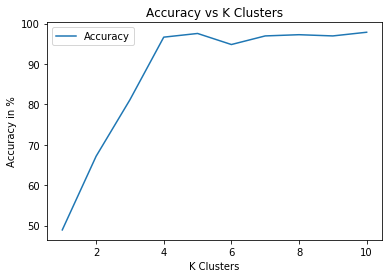

In [133]:
xAxis = np.arange(1, 11)
plt.figure()
plt.plot(xAxis, Acc, label='Accuracy')
plt.legend()
plt.xlabel('K Clusters')
plt.ylabel('Accuracy in %')
plt.title("Accuracy vs K Clusters")
plt.show()

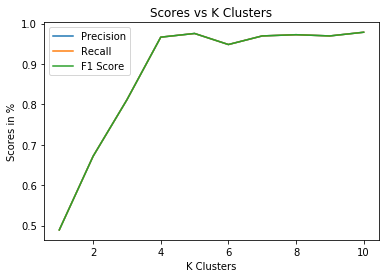

In [134]:
plt.figure()
plt.plot(xAxis, Prec, label='Precision')
plt.plot(xAxis, Recall, label='Recall')
plt.plot(xAxis, F1Score, label='F1 Score')
plt.legend()
plt.xlabel('K Clusters')
plt.ylabel('Scores in %')
plt.title("Scores vs K Clusters")
plt.show()

In [84]:
print("Accuracy: {}".format(accuracy_score(Y_True, Y_Pred)*100))

Avg = ['macro', 'micro', 'weighted', None]
for avg in Avg:
    print("\naverage={}".format(avg))
    print("Precision: {}".format(precision_score(Y_True, Y_Pred, average=avg)))
    print("Recall: {}".format(recall_score(Y_True, Y_Pred, average=avg)))
    print("F1 Score: {}".format(f1_score(Y_True, Y_Pred, average=avg)))

Accuracy: 92.40121580547113

average=macro
Precision: 0.910392156862745
Recall: 0.8954863639608767
F1 Score: 0.8971992837001936

average=micro
Precision: 0.9240121580547113
Recall: 0.9240121580547113
F1 Score: 0.9240121580547113

average=weighted
Precision: 0.9363347040944038
Recall: 0.9240121580547113
F1 Score: 0.9261726924316442

average=None
Precision: [1.         1.         0.72       0.92156863]
Recall: [0.88       0.98757764 0.93103448 0.78333333]
F1 Score: [0.93617021 0.99375    0.81203008 0.84684685]
